In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [3]:
import os #for dealing with directries
import numpy as np #numarical python
import matplotlib.pyplot as plt # for ploatong
import tensorflow as tf #To use diffrent type of Tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import mobilenet# MObike embaded application
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout# Minly need for classification task
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix#For evaluation cases

In [6]:
#Setting the path
dataset_path = '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals'
#List all the classes and types
classes = os.listdir(dataset_path)
num_classes = len(classes)
print(num_classes)
print(classes)

90
['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


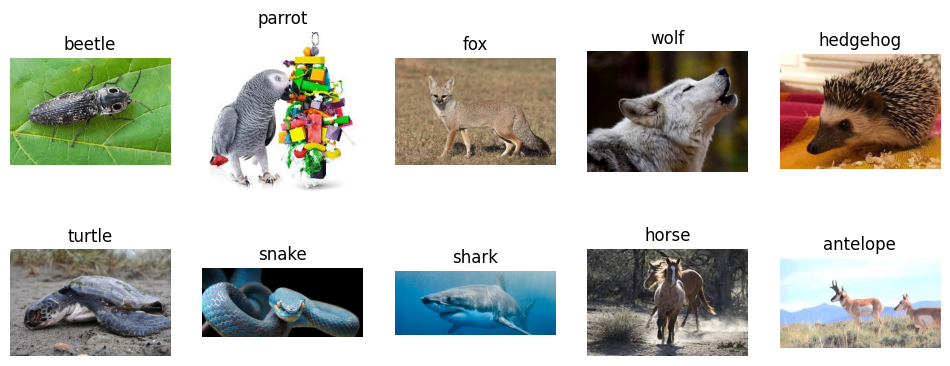

In [7]:
#Now start some visualization like oictures {Some samoke images}
plt.figure(figsize=(12, 12))
for i, class_name in enumerate(classes[ :10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]#0 stand for to show very first eliement
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(5, 5, i+1)# i+1 is used because the image shown one after other
  plt.imshow(img)
  plt.title(class_name)
  plt.axis('off')#To turn off Grid view
plt.show()


In [8]:
#Checking the gpu is working or not

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available")
else:
    print("GPU is not available, using CPU instead")

GPU is available
